In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict as od
import math

In [5]:
df = pd.read_parquet('/content/sample_data/sp500futures.parq')

print(df.head())
print(df.tail())

                     price    bid    ask  size    v        dv
dates                                                        
2009-09-28 09:30:00  50.79  50.70  50.79   100  100   5079.00
2009-09-28 09:30:00  50.71  50.70  50.79   638  638  32352.98
2009-09-28 09:31:32  50.75  50.75  50.76   100  100   5075.00
2009-09-28 09:31:33  50.75  50.72  50.75   100  100   5075.00
2009-09-28 09:31:50  50.75  50.73  50.76   300  300  15225.00
                      price     bid     ask   size      v          dv
dates                                                                
2018-10-05 15:59:59  116.20  116.18  116.19   2000   2000   232400.00
2018-10-05 15:59:59  116.20  116.18  116.19   3900   3900   453180.00
2018-10-05 16:00:00  116.22  116.20  116.21  42884  42884  4983978.48
2018-10-05 16:10:00  116.22    0.00  117.10      0      0        0.00
2018-10-05 18:30:00  116.22  114.71  117.95      0      0        0.00


<Axes: ylabel='price'>

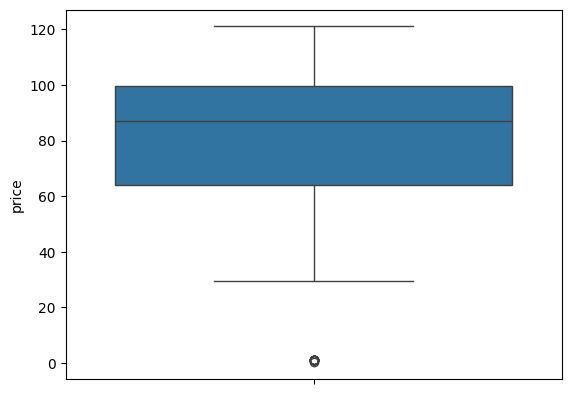

In [6]:
#Check Outliers

sns.boxplot(df.price)

In [7]:
def madOutlier(y, thresh = 3.):
    median = np.median(y)
    print(median)
    diff = np.sum((y - median) ** 2, axis=-1)
    diff = np.sqrt(diff)
    print(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    print(modified_z_score)
    return modified_z_score > thresh


In [8]:
mad = madOutlier(df.price.values.reshape(-1, 1))

86.96
[36.17 36.25 36.21 ... 29.26 29.26 29.26]
[1.41225268 1.41537627 1.41381447 ... 1.14245268 1.14245268 1.14245268]


In [9]:
df_0= df.loc[mad]
df_0

,price,bid,ask,size,v,dv
dates,,,,,,
2010-05-06 14:49:07,0.11,0.10,44.03,500,500,55.0
2010-05-06 14:53:30,1.10,1.10,30.28,2600,2600,2860.0
2010-05-06 14:55:32,1.10,1.10,50.57,300,300,330.0
2010-05-06 14:55:32,1.10,1.10,50.57,100,100,110.0
2010-05-06 14:55:32,1.10,1.00,50.57,200,200,220.0
2010-05-06 14:55:32,1.10,1.00,50.57,700,700,770.0
2010-05-06 14:55:32,1.10,1.00,50.57,1200,1200,1320.0
2010-05-06 14:55:32,1.10,0.55,50.57,500,500,550.0
2010-05-06 14:55:32,1.10,0.55,50.57,100,100,110.0


In [10]:
#Outliers

df = df.loc[~mad]
df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:30:00,50.79,50.70,50.79,100,100,5079.00
2009-09-28 09:30:00,50.71,50.70,50.79,638,638,32352.98
2009-09-28 09:31:32,50.75,50.75,50.76,100,100,5075.00
2009-09-28 09:31:33,50.75,50.72,50.75,100,100,5075.00
2009-09-28 09:31:50,50.75,50.73,50.76,300,300,15225.00
...,...,...,...,...,...,...
2018-10-05 15:59:59,116.20,116.18,116.19,2000,2000,232400.00
2018-10-05 15:59:59,116.20,116.18,116.19,3900,3900,453180.00
2018-10-05 16:00:00,116.22,116.20,116.21,42884,42884,4983978.48


In [11]:
def BarSampling(df, column, threshold, tick = False):
    t = df[column]
    ts = 0
    idx = []
    if tick:
        for i, x in enumerate(t):
            ts += 1
            if ts >= threshold:
                idx.append(i)
                ts = 0
    else:
        for i, x in enumerate(t):
            ts += x
            if ts >= threshold:
                idx.append(i)
                ts = 0
    return df.iloc[idx].drop_duplicates()



In [12]:
#Transformation into dollar bars

dollar_M = 1000000
dollar_df = BarSampling(df, 'dv', dollar_M)
dollar_df = dollar_df.groupby(level = 0).first()
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


In [13]:
def select_sample_data(ref, sub, price_col, date):
    xdf = ref[price_col].loc[date]
    xtdf = sub[price_col].loc[date]

    return xdf, xtdf

In [14]:
def plotSampleData(ref, sub, bar_type, *args, **kwds):
    f, axes = plt.subplots(3, sharex=True, sharey=True, figsize=(10, 7))
    ref.plot(*args, **kwds, ax=axes[0], label='price')
    sub.plot(*args, **kwds, ax=axes[0], marker='X', ls='', label=bar_type)
    axes[0].legend()
    ref.plot(*args, **kwds, ax=axes[1], marker='o', label='price')
    sub.plot(*args, **kwds, ax=axes[2], marker='X', ls='',
             color='r', label=bar_type)
    for ax in axes[1:]: ax.legend()
    plt.tight_layout()
    return

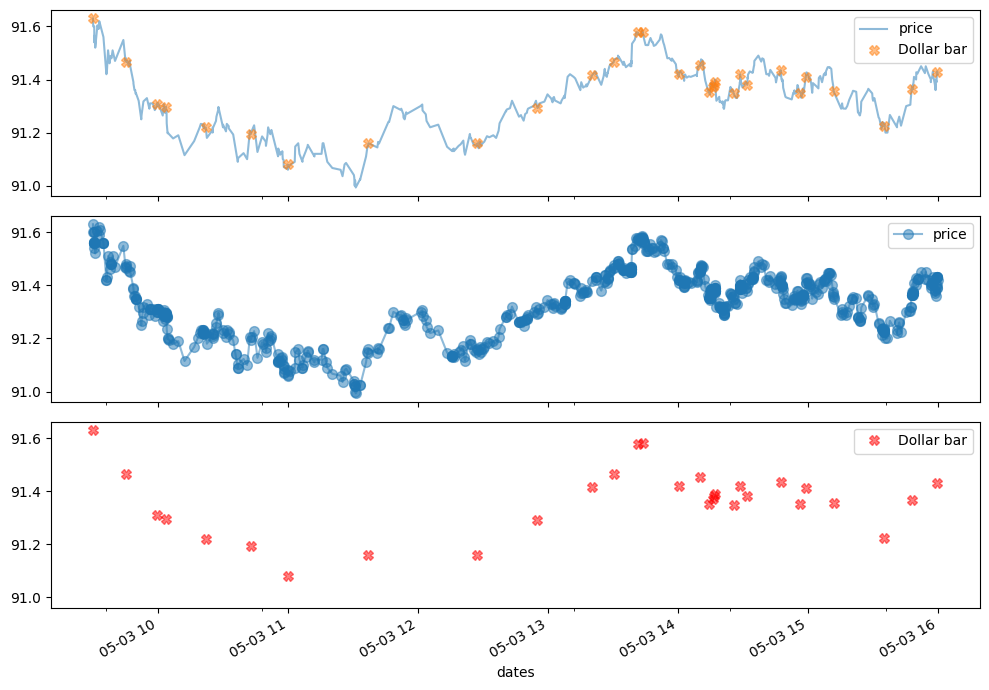

In [15]:
xDate = '2016-05-03'
xdf, xtdf = select_sample_data(df, dollar_df, 'price', xDate)
plotSampleData(xdf, xtdf, 'Dollar bar', alpha = 0.5, markersize = 7)

In [16]:
def scale(s):
    return (s - s.min()) / (s.max() - s.min())


def count_bars(df, price_col = 'price'):
    return df.groupby(pd.Grouper(freq='1W'))[price_col].count()

In [17]:
dc = scale(count_bars(dollar_df))
print(dc.std())

0.10871298288586546


In [18]:
def getReturns(s):
    arr = np.diff(np.log(s))
    return (pd.Series(arr, index=s.index[1:]))

In [19]:
def get_test_stats(bar_types, bar_returns, test_func, *args, **kwds):
    dct = {bar: (int(bar_ret.shape[0]), test_func(bar_ret, *args, **kwds))
           for bar, bar_ret in zip(bar_types, bar_returns)}
    df = (pd.DataFrame.from_dict(dct)
          .rename(index={0: 'sample size', 1: f'{test_func.__name__}_stat'}).T)
    return df



In [20]:
dr = getReturns(dollar_df.price)
df_ret = getReturns(df.price)
bar_types = ['dollar','sampling x']
bar_ret = [dr, df_ret]
autocorr = get_test_stats(bar_types, bar_ret, pd.Series.autocorr)
autocorr

,sample size,autocorr_stat
dollar,49995.0,-0.123306
sampling x,1416199.0,-0.092242


In [21]:
def partition_monthly(s) : return s.resample('1M').var()

dr_rs = partition_monthly(dr)
df_rs = partition_monthly(df_ret)
monthly_vars = [dr_rs, df_rs]

get_test_stats(bar_types, monthly_vars, np.var)

,sample size,var_stat
dollar,110.0,2.109742e-09
sampling x,110.0,5.295761e-12


In [22]:
import scipy.stats as stats
get_test_stats(bar_types, bar_ret, stats.jarque_bera)

,sample size,jarque_bera_stat
dollar,49995,"(51626157367.18182, 0.0)"
sampling x,1416199,"(206784897320995.06, 0.0)"


In [23]:
def getDailyVolatility(close, span = 100):
    # daily vol reindexed to close
    df0 = close.index.searchsorted(close.index - pd.Timedelta(days=1))
    df0 = df0[df0 > 0]
    df0 = (pd.Series(close.index[df0 - 1],
                     index=close.index[close.shape[0] - df0.shape[0]:]))
    try:
        df0 = close.loc[df0.index] / close.loc[df0.values].values - 1  # daily rets
    except Exception as e:
        print(f'error: {e}\nplease confirm no duplicate indices')
    df0 = df0.ewm(span = span).std().rename('dailyVol')
    return df0

In [24]:
dailyVol = getDailyVolatility(dollar_df.price)
dailyVol

dates
2009-09-29 09:59:21         NaN
2009-09-29 10:04:46    0.005981
2009-09-29 10:31:39    0.004469
2009-09-29 10:52:23    0.004376
2009-09-29 11:34:53    0.004261
                         ...   
2018-10-05 15:58:23    0.003059
2018-10-05 15:59:20    0.003037
2018-10-05 15:59:55    0.003014
2018-10-05 15:59:59    0.002990
2018-10-05 16:00:00    0.002964
Name: dailyVol, Length: 49969, dtype: float64

In [25]:
def CusumEvents(df: pd.Series, limit: float):
    idx, _up, _dn = [], 0, 0
    diff = df.diff()
    for i in range(len(diff)):
        if _up + diff.iloc[i] > 0:
            _up = _up + diff.iloc[i]
        else:
            _up = 0

        if _dn + diff.iloc[i] < 0:
            _dn = _dn + diff.iloc[i]
        else:
            _dn = 0

        if _up > limit:
            _up = 0;
            idx.append(i)
        elif _dn < - limit:
            _dn = 0;
            idx.append(i)
    return idx

In [26]:
#identify significant events using cumulative sum filter based on threshold determined by volatility

threshold = 1.65 * dailyVol.std() + dailyVol.mean()
cusum = CusumEvents(dollar_df.price, threshold)
tEvents = dollar_df.iloc[cusum].index
tEvents

DatetimeIndex(['2009-09-28 09:53:49', '2009-09-28 10:02:52',
               '2009-09-28 10:10:21', '2009-09-28 10:19:36',
               '2009-09-28 10:24:23', '2009-09-28 10:34:30',
               '2009-09-28 11:10:57', '2009-09-28 11:24:29',
               '2009-09-28 11:37:06', '2009-09-28 11:51:43',
               ...
               '2018-10-05 15:22:55', '2018-10-05 15:27:58',
               '2018-10-05 15:33:58', '2018-10-05 15:45:00',
               '2018-10-05 15:48:02', '2018-10-05 15:53:55',
               '2018-10-05 15:56:25', '2018-10-05 15:58:23',
               '2018-10-05 15:59:59', '2018-10-05 16:00:00'],
              dtype='datetime64[ms]', name='dates', length=41774, freq=None)

In [27]:
def addVerticalBarrier(tEvents, close, numDays=1):
    t1 = close.index.searchsorted(tEvents + pd.Timedelta(days=numDays))
    t1 = t1[t1 < close.shape[0]]
    t1 = (pd.Series(close.index[t1], index=tEvents[:t1.shape[0]]))
    return t1

In [28]:
t1 = addVerticalBarrier(tEvents, dollar_df.price, numDays = 1)
t1

dates
2009-09-28 09:53:49   2009-09-29 09:59:21
2009-09-28 10:02:52   2009-09-29 10:04:46
2009-09-28 10:10:21   2009-09-29 10:31:39
2009-09-28 10:19:36   2009-09-29 10:31:39
2009-09-28 10:24:23   2009-09-29 10:31:39
                              ...        
2018-10-04 15:31:17   2018-10-05 15:33:58
2018-10-04 15:41:04   2018-10-05 15:45:00
2018-10-04 15:47:18   2018-10-05 15:48:02
2018-10-04 15:51:37   2018-10-05 15:53:55
2018-10-04 16:00:00   2018-10-05 16:00:00
Name: dates, Length: 41737, dtype: datetime64[ms]

In [29]:
minRet = 0.001
ptSl = [1, 1]
#events = getEvents(dollar_df.price, tEvents=tEvents, ptSl=ptSl, trgt=dailyVol, minRet=minRet, numThreads=1, t1 = t1)

In [30]:
#events

In [31]:
from typing import Tuple, List, Dict, Union, Optional, Any, Generator

def apply_triple_barrier(close: pd.Series, events: pd.DataFrame,
                                   pt_sl: List, molecule: np.ndarray) -> pd.DataFrame:
    events_ = events.loc[molecule]
    out = events_[['t1']].copy(deep=True)
    if pt_sl[0] > 0:
        pt = pt_sl[0] * events_['trgt']
    else:
        pt = pd.Series(data=[np.nan] * len(events.index), index=events.index)
    if pt_sl[1] > 0:
        sl = -pt_sl[1] * events_['trgt']
    else:
        sl = pd.Series(data=[np.nan] * len(events.index), index=events.index)
    for loc, t1 in events_['t1'].fillna(close.index[-1]).items():
        df0 = close[loc: t1]
        df0 = (df0 / close[loc] - 1) * events_.at[loc, 'side']
        out.loc[loc, 'sl'] = df0[df0 < sl[loc]].index.min()
        out.loc[loc, 'pt'] = df0[df0 > pt[loc]].index.min()
    return out


def get_events_triple_barrier(
    close: pd.Series, tEvents: np.ndarray, pt_sl: float, trgt: pd.Series, minRet: float,
    numThreads: int = 1, t1: Union[pd.Series, bool] = False, side: pd.Series = None
) -> pd.DataFrame:
    trgt = trgt.loc[trgt.index.intersection(tEvents)]
    trgt = trgt[trgt > minRet]
    if t1 is False:
        t1 = pd.Series(pd.NaT, index=tEvents)
    if side is None:
        side_, pt_sl_ = pd.Series(np.array([1.] * len(trgt.index)), index=trgt.index), [pt_sl[0], pt_sl[0]]
    else:
        side_, pt_sl_ = side.loc[trgt.index.intersection(side.index)], pt_sl[:2]
    events = pd.concat({'t1': t1, 'trgt': trgt, 'side': side_}, axis=1).dropna(subset=['trgt'])
    df0 = apply_triple_barrier(close, events, pt_sl_, events.index)
    events['t1'] = df0.dropna(how='all').min(axis=1)
    if side is None:
        events = events.drop('side', axis=1)
    return events

In [32]:
#identify profit taking, stop loss, and time barrier events

events = get_events_triple_barrier(close=dollar_df.price, tEvents=tEvents, pt_sl=ptSl,
                                    trgt=dailyVol, minRet=minRet,
                                    numThreads=1, t1=t1)
events

,t1,trgt
dates,,
2009-09-29 10:04:46,2009-09-30 09:56:31,0.005981
2009-09-29 10:31:39,2009-09-29 12:00:17,0.004469
2009-09-29 10:52:23,2009-09-30 09:44:47,0.004376
2009-09-29 11:34:53,2009-09-30 09:44:47,0.004261
2009-09-29 12:00:17,2009-09-29 13:30:07,0.004977
...,...,...
2018-10-05 15:53:55,NaT,0.003134
2018-10-05 15:56:25,NaT,0.003108
2018-10-05 15:58:23,NaT,0.003059


In [33]:
def getBins(events, close):
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[events_.index] - 1
    if 'side' in events_: out['ret'] *= events_['side']
    out['bin'] = np.sign(out['ret'])
    if 'side' in events_: out.loc[out['ret'] <= 0, 'bin'] = 0
    return out


In [34]:
#Generate decision labels

labels = getBins(events, dollar_df.price)
labels

,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,-1.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,1.0
...,...,...
2018-10-05 10:50:40,-0.004462,-1.0
2018-10-05 11:02:25,-0.004260,-1.0
2018-10-05 11:11:13,-0.004438,-1.0


In [35]:
def dropLabels(events, minPct=0.05):
    while True:
        df0 = events['bin'].value_counts(normalize=True)
        if df0.min() > minPct or df0.shape[0] < 3:
            break
        print('dropped label', df0.idxmin(), df0.min())
        events = events[events['bin'] != df0.idxmin()]
    return events

In [36]:
#drop rare labels
drop_labels = dropLabels(labels, 0.05)
drop_labels

dropped label 0.0 0.0020131332981833867


,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,-1.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,1.0
...,...,...
2018-10-05 10:50:40,-0.004462,-1.0
2018-10-05 11:02:25,-0.004260,-1.0
2018-10-05 11:11:13,-0.004438,-1.0


In [37]:
def getBinsNew(events, close, t1=None):
    events_ = events.dropna(subset=['t1'])
    px = events_.index.union(events_['t1'].values).drop_duplicates()
    px = close.reindex(px, method='bfill')
    out = pd.DataFrame(index=events_.index)
    out['ret'] = px.loc[events_['t1'].values].values / px.loc[events_.index] - 1
    if 'side' in events_: out['ret'] *= events_['side']
    out['bin'] = np.sign(out['ret'])

    if 'side' not in events_:
        vtouch_first_idx = events[events['t1'].isin(t1.values)].index
        out.loc[vtouch_first_idx, 'bin'] = 0.

    if 'side' in events_: out.loc[out['ret'] <= 0, 'bin'] = 0
    return out

In [38]:
#return a 0 whenever the vertical barrier is touched first

labels_new = getBinsNew(events, dollar_df.price, t1)
labels_new

,ret,bin
dates,,
2009-09-29 10:04:46,-0.012754,-1.0
2009-09-29 10:31:39,-0.004635,0.0
2009-09-29 10:52:23,-0.005233,-1.0
2009-09-29 11:34:53,-0.004461,-1.0
2009-09-29 12:00:17,0.005629,0.0
...,...,...
2018-10-05 10:50:40,-0.004462,0.0
2018-10-05 11:02:25,-0.004260,0.0
2018-10-05 11:11:13,-0.004438,0.0


In [39]:
def getBollingerBand(price, window = None, width = None, numsd = None):
    ave = price.rolling(window).mean()
    sd = price.rolling(window).std(ddof=0)
    if width:
        upband = ave * (1 + width)
        dnband = ave * (1 - width)
        return price, np.round(ave, 3), np.round(upband, 3), np.round(dnband, 3)
    if numsd:
        upband = ave + (sd * numsd)
        dnband = ave - (sd * numsd)
        return price, np.round(ave, 3), np.round(upband, 3), np.round(dnband, 3)

In [40]:
#Generate Bollinger Bands

window = 5
bb_df = pd.DataFrame()
bb_df['price'], bb_df['ave'], bb_df['upper'], bb_df['lower'] = getBollingerBand(dollar_df.price, window = window, numsd = 1)
bb_df.dropna(inplace = True)
bb_df

,price,ave,upper,lower
dates,,,,
2009-09-28 10:10:21,51.29,51.178,51.258,51.098
2009-09-28 10:19:36,51.23,51.210,51.270,51.150
2009-09-28 10:24:23,51.25,51.232,51.282,51.182
2009-09-28 10:34:30,51.33,51.270,51.306,51.234
2009-09-28 10:45:25,51.32,51.284,51.323,51.245
...,...,...,...,...
2018-10-05 15:58:23,116.19,116.227,116.255,116.199
2018-10-05 15:59:20,116.18,116.209,116.232,116.186
2018-10-05 15:59:55,116.19,116.206,116.230,116.182


In [41]:
def getUpCross(df, col):
    crit1 = df[col].shift(1) < df.upper.shift(1)
    crit2 = df[col] > df.upper
    return df[col][(crit1) & (crit2)]

def getDownCross(df, col):
    crit1 = df[col].shift(1) > df.lower.shift(1)
    crit2 = df[col] < df.lower
    return df[col][(crit1) & (crit2)]

<Axes: xlabel='dates'>

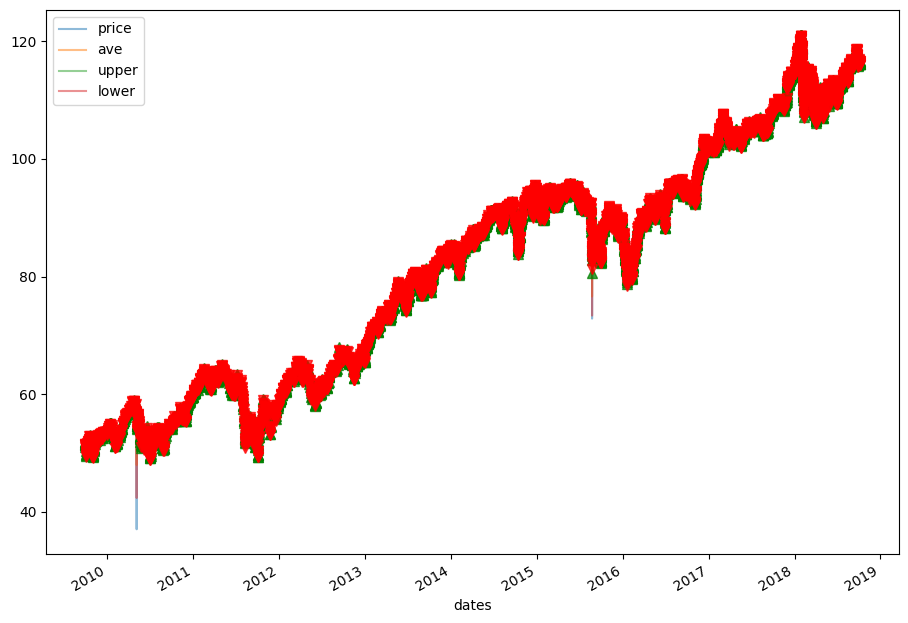

In [42]:
up = getUpCross(bb_df, 'price')
down = getDownCross(bb_df, 'price')

f, ax = plt.subplots(figsize = (11,8))

bb_df.loc[:].plot(ax=ax,alpha=.5)
up.loc[:].plot(ax = ax,ls = '', marker = '^', markersize = 7, alpha = .75, label = 'upcross', color = 'g')
down.loc[:].plot(ax = ax, ls = '', marker = 'v', markersize = 7, alpha = .75, label = 'downcross', color = 'r')

In [43]:
side_up = pd.Series(1,index = up.index)
side_down = pd.Series(-1, index = down.index)
side = pd.concat([side_up, side_down]).sort_index()
side

dates
2009-09-28 10:34:30    1
2009-09-28 11:37:06    1
2009-09-28 14:11:43   -1
2009-09-28 14:28:41    1
2009-09-28 15:34:40    1
                      ..
2018-10-05 13:48:37    1
2018-10-05 15:08:37    1
2018-10-05 15:48:02    1
2018-10-05 15:58:23   -1
2018-10-05 16:00:00    1
Length: 13013, dtype: int64

In [44]:
side.value_counts()

 1    6745
-1    6268
Name: count, dtype: int64

In [45]:
minRet = .001
ptSl = [1,2] #set pt threshold at 1 or sl at 2; e.g. a 1 to 2 reward-risk ratio

#Integrate meta-labeling into significant events
MetaLabeling = get_events_triple_barrier(close=dollar_df.price, tEvents=tEvents, pt_sl=ptSl,
                                    trgt=dailyVol, minRet=minRet,
                                    numThreads=1, t1=t1, side=side)

MetaLabeling

'''
MetaLabeling = MetaLabeling.dropna()
MetaLabeling
'''

'\nMetaLabeling = MetaLabeling.dropna()\nMetaLabeling\n'

In [46]:
#label

Meta_side = MetaLabeling.dropna().side
Meta_bins = getBins(MetaLabeling, dollar_df.price).dropna()
Meta_bins

,ret,bin
dates,,
2009-09-29 12:00:17,0.009726,1.0
2009-09-29 13:30:07,-0.015269,0.0
2009-09-29 15:34:28,0.004519,1.0
2009-09-30 09:44:47,0.007403,1.0
2009-09-30 11:57:40,-0.013823,0.0
...,...,...
2018-10-04 14:16:16,-0.001151,0.0
2018-10-04 14:40:44,0.004907,1.0
2018-10-04 15:47:18,-0.002231,0.0


In [47]:
X_m = pd.merge_asof(Meta_bins, side.to_frame().rename(columns = {0:'side'}),
                   left_index = True, right_index = True, direction = 'forward')
X_m.ret.sum()

-0.11755227577374217

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report

X = Meta_side.values.reshape(-1, 1)
y = Meta_bins.bin.values
pd.DataFrame(X, y).head()

,0
1.0,-1.0
0.0,1.0
1.0,-1.0
1.0,-1.0
0.0,1.0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

In [50]:
rf = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

              precision    recall  f1-score   support

         0.0       0.49      0.52      0.51      1744
         1.0       0.56      0.53      0.55      2025

    accuracy                           0.53      3769
   macro avg       0.53      0.53      0.53      3769
weighted avg       0.53      0.53      0.53      3769



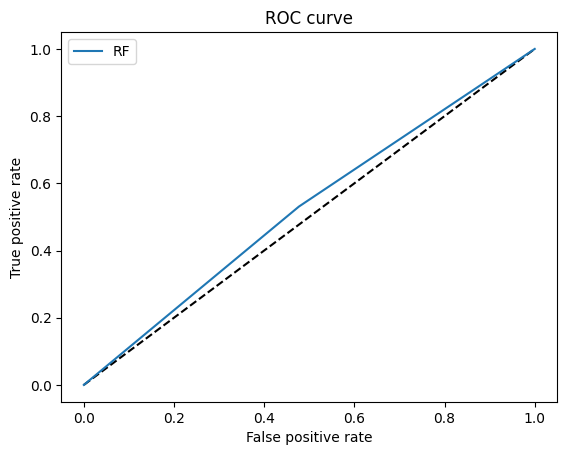

In [51]:
#Basic random forest evaluation

y_pred_rf = rf.predict_proba(X_test)[:,1]
y_pred = rf.predict(X_test)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
print(classification_report(y_test, y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [52]:
def num_conc_events(closeIdx: np.ndarray, t1: pd.Series, molecule: np.ndarray) -> pd.Series:
    t1 = t1.fillna(closeIdx[-1])
    t1 = t1[t1 >= molecule[0]]
    t1 = t1.loc[:t1[molecule].max()]
    iloc = closeIdx.searchsorted(pd.DatetimeIndex([t1.index[0], t1.max()]))
    count = pd.Series([0] * (iloc[1] + 1 - iloc[0]), index=closeIdx[iloc[0]: iloc[1] + 1])
    for tIn, tOut in t1.items():
        count.loc[tIn: tOut] += 1
    return count.loc[molecule[0]: t1[molecule].max()]

In [53]:
#identify overlapping events

num_conc = num_conc_events(closeIdx=dollar_df.index, t1=events['t1'], molecule=events.index)
num_conc

dates
2009-09-29 10:04:46     1
2009-09-29 10:31:39     2
2009-09-29 10:52:23     3
2009-09-29 11:34:53     4
2009-09-29 12:00:17     5
                       ..
2018-10-05 15:58:23    23
2018-10-05 15:59:20    23
2018-10-05 15:59:55    23
2018-10-05 15:59:59    24
2018-10-05 16:00:00    25
Length: 49968, dtype: int64

<Axes: xlabel='dates'>

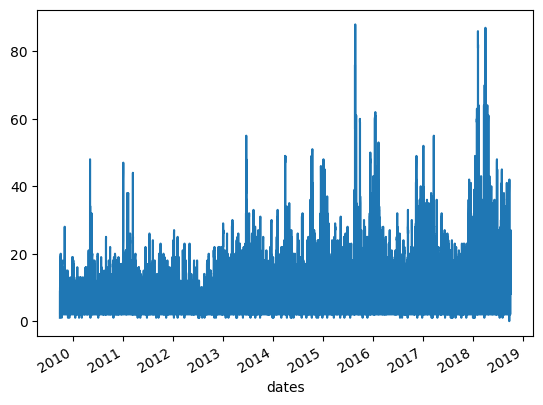

In [54]:
num_conc.plot()

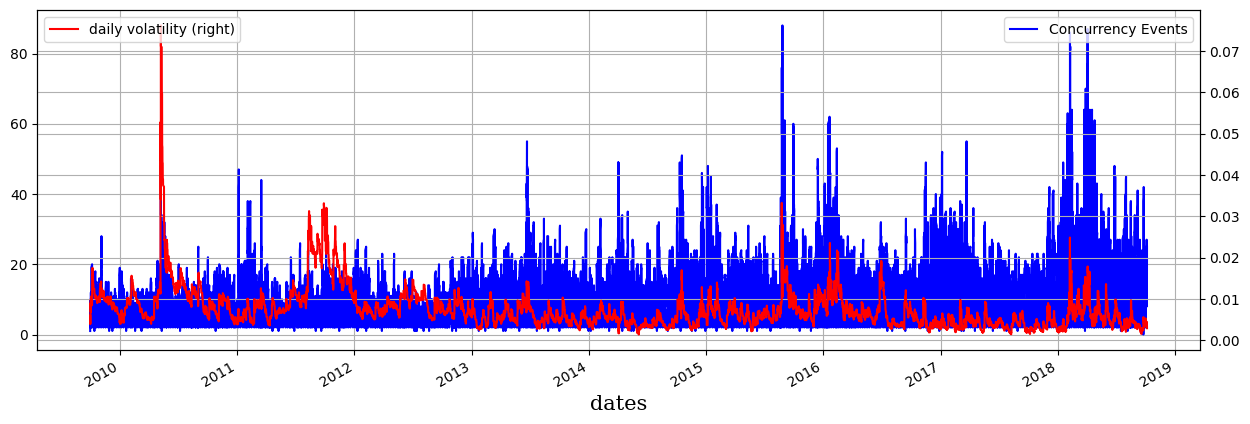

In [55]:
plt.figure(figsize = (15,5))
plt.xlabel('Time', fontfamily = 'Serif', fontsize = 15)

plt.style.use('default')
ax1 = num_conc.plot(color = 'blue', grid = True, label = 'Concurrency Events')
ax2 = dailyVol.plot(color = 'red', grid = True, secondary_y = True, label = 'daily volatility')

ax1.legend(loc = 1)
ax2.legend(loc = 2)

In [56]:
coEvents = num_conc.to_frame()
ewmasd = dailyVol.to_frame()
combine = ewmasd.join(coEvents, how = 'inner')
combine.columns = ['ewmasd', 'coEvents']
combine['ewmasd_std'] = (combine['ewmasd']-combine['ewmasd'].mean())/combine['ewmasd'].std()
combine['coEvents_std'] = (combine['coEvents']-combine['coEvents'].mean())/combine['coEvents'].std()

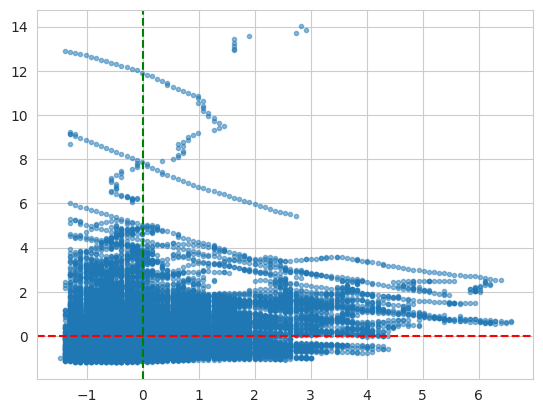

In [57]:
sns.set_style('whitegrid')
plt.scatter(combine['coEvents_std'], combine['ewmasd_std'], marker = '.', alpha = 0.5)
plt.axhline(y = combine['coEvents_std'].mean(), c='r', ls='--')
plt.axvline(x = combine['ewmasd_std'].mean(), c='g', ls='--')
plt.show()

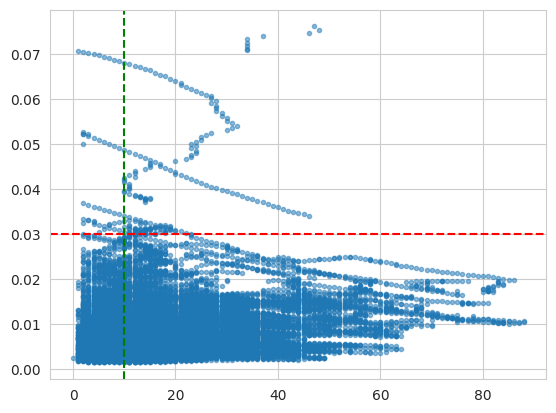

In [58]:
plt.scatter(combine['coEvents'], combine['ewmasd'], marker = '.', alpha = 0.5)
plt.axhline(y = 0.03, c='r', ls='--')
plt.axvline(x = 10, c='g', ls='--')
plt.show()

In [59]:
def sample_weights(t1: pd.Series, num_conc_events: pd.Series, molecule: np.ndarray) -> pd.Series:
    weights = pd.Series([0] * len(molecule), index=molecule)
    for tIn, tOut in t1.loc[weights.index].items():
        weights.loc[tIn] = (1.0 / num_conc_events.loc[tIn: tOut]).mean()
    return weights

In [60]:
#Monitor overlapping events by uniqueness

avg_uniq = sample_weights(t1=events['t1'], num_conc_events=num_conc, molecule=events.index)

<ipython-input-59-717a1eb0129a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.257624716553288' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights.loc[tIn] = (1.0 / num_conc_events.loc[tIn: tOut]).mean()


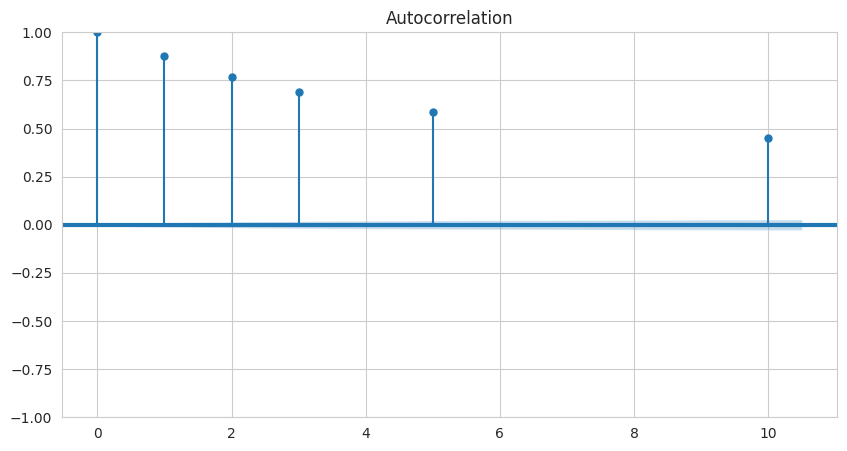

In [61]:
import statsmodels.api as sm

#First order serial correlation AR(1) of the time series
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
with sns.axes_style('whitegrid'):
    sm.graphics.tsa.plot_acf(avg_uniq[:-1], lags=[0, 1, 2, 3, 5, 10], lw=3)

In [62]:
dollar_df

,price,bid,ask,size,v,dv
dates,,,,,,
2009-09-28 09:46:35,51.07,51.05,51.07,900,900,45963.00
2009-09-28 09:53:49,51.14,51.13,51.14,2000,2000,102280.00
2009-09-28 09:55:26,51.14,51.11,51.14,100,100,5114.00
2009-09-28 10:02:52,51.25,51.24,51.26,4300,4300,220375.00
2009-09-28 10:10:21,51.29,51.28,51.29,4500,4500,230805.00
...,...,...,...,...,...,...
2018-10-05 15:58:23,116.19,116.19,116.20,1354,1354,157321.26
2018-10-05 15:59:20,116.18,116.17,116.19,300,300,34854.00
2018-10-05 15:59:55,116.19,116.18,116.20,800,800,92952.00


<Axes: xlabel='dates'>

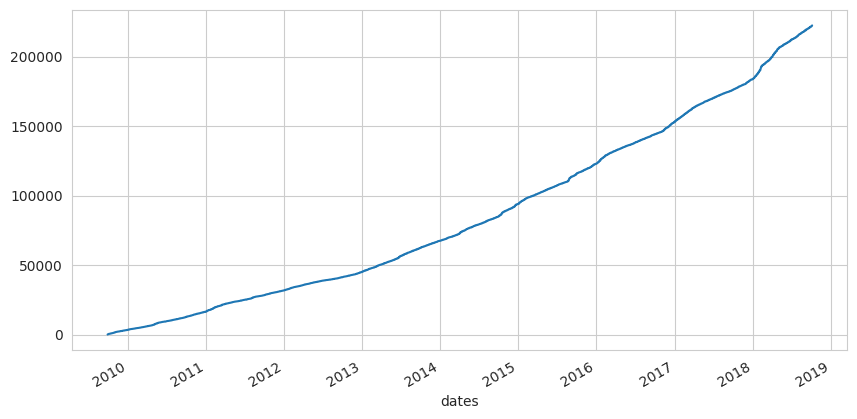

In [63]:
cumsum_dollar = np.log(dollar_df.price).cumsum()
cumsum_dollar.plot()

In [64]:
def getWeights(d, size):
    w = [1.]
    for k in range(1, size):
        w_ = -w[-1] / k * (d - k + 1)
        w.append(w_)
    w = np.array(w[:: -1]).reshape(-1, 1)
    return w

def fracDiff(series, d, thres = .01):
    w = getWeights(d, series.shape[0])
    w_ = np.cumsum(abs(w))
    w_ /= w_[-1]
    skip = w_[w_ > thres].shape[0]
    df = {}
    for name in series.columns:
        seriesF = series[[name]].fillna(method='ffill').dropna()
        df_ = pd.Series()
        for iloc in range(skip, seriesF.shape[0]):
            loc = seriesF.index[iloc]
            test_val = series.loc[loc, name]
            if isinstance(test_val, (pd.Series, pd.DataFrame)):
                test_val = test_val.resample('1m').mean()
            if not np.isfinite(test_val).any():
                continue
            try:
                df_.loc[loc] = np.dot(w[-(iloc + 1):, :].T, seriesF.loc[:loc])[0, 0]
            except:
                continue
        df[name] = df_.copy(deep=True)
    df = pd.concat(df, axis=1)
    return df

In [65]:
cols = ['adfStat','pVal','lags','nObs','95% conf', 'corr']
out = pd.DataFrame(columns = cols)
for d in np.linspace(0, 2, 21):
    try:
        df1 = np.log(dollar_df).resample('1D').last().dropna()
        df2 = fracDiff(df1, d, thres = 1e-5)
        corr = np.corrcoef(df1.loc[df2.index, 'price'], df2['price'])[0,1]
        df2 = sm.tsa.stattools.adfuller(df2['price'], maxlag = 1, regression = 'c', autolag = None)
        out.loc[d] = list(df2[:4]) + [df2[4]['5%']] + [corr]
    except Exception as e:
        print(f'd: {d}, error: {e}')
        continue

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

d: 0.1, error: division by zero
d: 0.2, error: Invalid input, x is constant
d: 0.30000000000000004, error: Invalid input, x is constant
d: 0.4, error: maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-64-88f1e69c7fd7>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.f

,adfStat,pVal,lags,nObs,95% conf,corr
0.0,-1.012841,7.485521e-01,1.0,2270.0,-2.862814,1.000000
0.5,-2.698273,7.433753e-02,1.0,5.0,-3.929280,0.892108
0.6,-1.538065,5.146042e-01,1.0,15.0,-3.084908,0.705352
0.7,-2.933960,4.153905e-02,1.0,40.0,-2.937069,0.370850
0.8,-5.592348,1.320352e-06,1.0,118.0,-2.886363,0.249107
0.9,-15.055688,9.157372e-28,1.0,413.0,-2.868564,0.108808
1.0,-34.122726,0.000000e+00,1.0,2269.0,-2.862815,0.015943
1.1,-27.386939,0.000000e+00,1.0,1140.0,-2.864079,0.033600
1.2,-30.227045,0.000000e+00,1.0,1207.0,-2.863938,0.021236
1.3,-34.980187,0.000000e+00,1.0,1421.0,-2.863576,0.013263


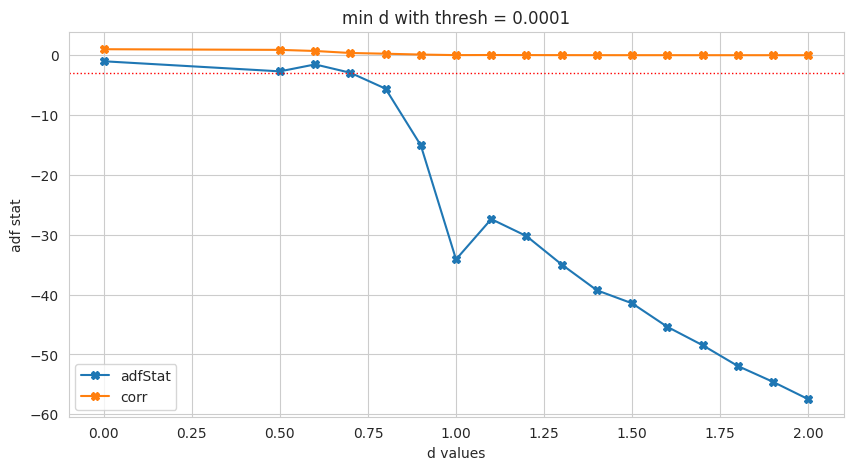

In [66]:
f,ax = plt.subplots()
out[['adfStat', 'corr']].plot(ax = ax, marker = 'X')
ax.axhline(out['95% conf'].mean(), lw = 1, color = 'r', ls = 'dotted')
ax.set_title('min d with thresh = 0.0001')
ax.set_xlabel('d values')
ax.set_ylabel('adf stat');
display(out)

In [67]:
min_ffd = out[out.pVal < 0.05].iloc[0].name
min_ffd

0.7000000000000001

In [68]:
def getWeights_FFD(d, thres):
    w = [1.]
    k = 1
    while abs(w[-1]) >= thres:
        w_ = -w[-1] / k * (d - k + 1)
        w.append(w_)
        k += 1
    w = np.array(w[:: -1]).reshape(-1, 1)[1:]
    return w

def fracDiff_FFD(series, d, thres=1e-5):
    w = getWeights_FFD(d, thres)
    width = len(w) - 1
    df = {}
    for name in series.columns:
        seriesF = series[[name]].fillna(method='ffill').dropna()
        df_ = pd.Series()
        for iloc1 in range(width, seriesF.shape[0]):
            loc0 = seriesF.index[iloc1 - width]
            loc1 = seriesF.index[iloc1]
            if not np.isfinite(series.loc[loc1, name]):
                continue
            df_.loc[loc1] = np.dot(w.T, seriesF.loc[loc0: loc1])[0, 0]
        df[name] = df_.copy(deep=True)
    df = pd.concat(df, axis=1)
    return df

In [69]:
d_values = fracDiff_FFD(dollar_df, min_ffd, thres = 1e-5)
d_values

<ipython-input-68-d1ec0f5329b0>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-68-d1ec0f5329b0>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-68-d1ec0f5329b0>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-68-d1ec0f5329b0>:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  seriesF = series[[name]].fillna(method='ffill').dropna()
<ipython-input-68-d1ec0f5329b0>:16: FutureWarning: DataFrame.fillna with 'me

,price,bid,ask,size,v,dv
2009-10-30 15:38:29,0.385793,0.389346,0.379426,-204.558434,-204.558434,-1.012005e+04
2009-10-30 15:53:12,0.148127,0.148462,0.145559,-105.676187,-105.676187,-5.354629e+03
2009-11-02 09:29:50,0.394654,0.294713,0.392871,1112.634132,1112.634132,5.524649e+04
2009-11-02 09:50:40,0.159507,0.219493,0.158112,-116.495284,-116.495284,-5.962864e+03
2009-11-02 09:54:04,0.441356,0.468815,0.460201,-854.446859,-854.446859,-4.232850e+04
...,...,...,...,...,...,...
2018-10-05 15:58:23,0.572164,0.580718,0.580800,294.218115,294.218115,3.410035e+04
2018-10-05 15:59:20,0.594463,0.586404,0.596479,-977.678993,-977.678993,-1.136489e+05
2018-10-05 15:59:55,0.615191,0.613300,0.616368,215.800302,215.800302,2.503105e+04
2018-10-05 15:59:59,0.620507,0.609351,0.601365,1155.402601,1155.402601,1.342235e+05


In [70]:
frac_corr = pd.DataFrame([d_values.price, dollar_df.price]).T.dropna().corr()
frac_corr

,price,price
price,1.000000,0.488167
price,0.488167,1.000000


In [71]:
sm.tsa.stattools.coint(frac_corr.iloc[:,0], frac_corr.iloc[:,1])

<ipython-input-71-8968766c548d>:1: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  sm.tsa.stattools.coint(frac_corr.iloc[:,0], frac_corr.iloc[:,1])


(-inf, 0.0, array([-48.37534, -16.26923, -10.00565]))

In [72]:
import scipy.stats as stats
stats.jarque_bera(d_values)

SignificanceResult(statistic=896220553036.2236, pvalue=0.0)

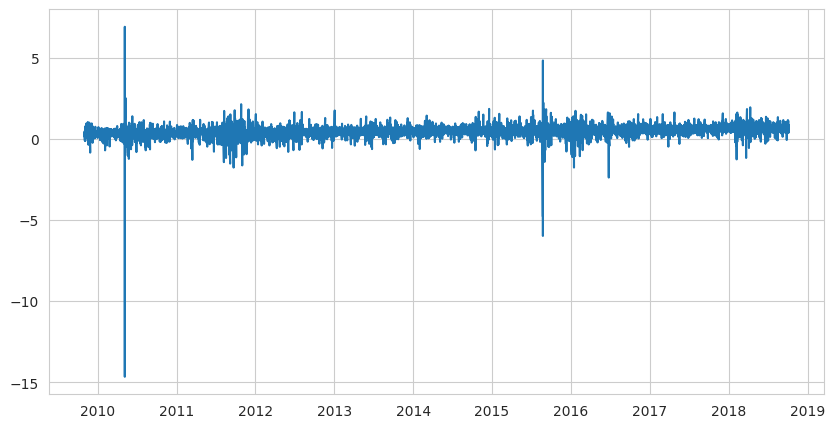

In [73]:
plt.plot(d_values.price)

In [74]:
def tradableHour(i, start='09:40', end='15:50'):
    time = i.strftime('%H:%M')
    return (time < end and time > start)


def getTEvents(gRaw, h, symmetric=True, isReturn=False):
    tEvents = []
    if isReturn:
        diff = gRaw
    else:
        diff = gRaw.diff()
    if symmetric:
        sPos, sNeg = 0, 0
        if np.shape(h) == ():

            for i in diff.index[1:]:
                sPos, sNeg = max(0, sPos + diff.loc[i]), min(0, sNeg + diff.loc[i])
                if sNeg < -h and tradableHour(i):
                    sNeg = 0;
                    tEvents.append(i)
                elif sPos > h and tradableHour(i):
                    sPos = 0;
                    tEvents.append(i)
        else:
            for i in diff.index[1:]:
                sPos, sNeg = max(0, sPos + diff.loc[i]), min(0, sNeg + diff.loc[i])
                if sNeg < -h[i] and tradableHour(i):
                    sNeg = 0;
                    tEvents.append(i)
                elif sPos > h[i] and tradableHour(i):
                    sPos = 0;
                    tEvents.append(i)
    else:
        sAbs = 0
        if np.shape(h) == ():

            for i in diff.index[1:]:
                sAbs = sAbs + diff.loc[i]
                if sAbs > h and tradableHour(i):
                    sAbs = 0;
                    tEvents.append(i)

        else:
            for i in diff.index[1:]:
                sAbs = sAbs + diff.loc[i]
                if sAbs > h[i] and tradableHour(i):
                    sAbs = 0;
                    tEvents.append(i)

    return pd.DatetimeIndex(tEvents)

In [75]:
tEvents = getTEvents(d_values.price, h = d_values.std().iat[0] * 2)
tEvents

DatetimeIndex(['2009-11-02 12:37:26', '2009-11-02 13:28:29',
               '2009-11-03 09:57:00', '2009-11-04 11:53:41',
               '2009-11-04 14:41:43', '2009-11-04 15:43:57',
               '2009-11-05 09:46:35', '2009-11-06 10:39:27',
               '2009-11-06 12:37:18', '2009-11-09 09:55:20',
               ...
               '2018-09-26 09:43:07', '2018-09-26 10:07:41',
               '2018-09-26 15:47:29', '2018-09-27 10:02:15',
               '2018-09-27 15:39:35', '2018-09-28 10:35:39',
               '2018-10-01 09:41:05', '2018-10-02 10:38:30',
               '2018-10-03 09:44:00', '2018-10-05 11:53:14'],
              dtype='datetime64[ns]', length=3484, freq=None)

In [76]:
dollar_feature = dollar_df.price.loc[tEvents]
dollar_feature

2009-11-02 12:37:26     49.5300
2009-11-02 13:28:29     49.3600
2009-11-03 09:57:00     49.6125
2009-11-04 11:53:41     50.3905
2009-11-04 14:41:43     50.4500
                         ...   
2018-09-28 10:35:39    115.9530
2018-10-01 09:41:05    116.3600
2018-10-02 10:38:30    116.0500
2018-10-03 09:44:00    116.9400
2018-10-05 11:53:14    116.0700
Name: price, Length: 3484, dtype: float64

In [77]:
frac_diff_feature = d_values.loc[tEvents]
frac_diff_feature

,price,bid,ask,size,v,dv
2009-11-02 12:37:26,-0.025161,-0.022824,-0.014612,-347.770145,-347.770145,-17447.013820
2009-11-02 13:28:29,0.309668,0.308941,0.300175,183.176019,183.176019,9015.280894
2009-11-03 09:57:00,0.473492,0.473386,0.479503,-440.919645,-440.919645,-21775.660221
2009-11-04 11:53:41,0.190426,0.199256,0.200057,-2734.142039,-2734.142039,-138152.007219
2009-11-04 14:41:43,0.529761,0.524962,0.521984,-376.071510,-376.071510,-18754.372511
...,...,...,...,...,...,...
2018-09-28 10:35:39,0.746292,0.751325,0.751375,-245.756908,-245.756908,-28463.599996
2018-10-01 09:41:05,0.624905,0.625806,0.603581,-1688.254083,-1688.254083,-196465.437273
2018-10-02 10:38:30,0.421697,0.426438,0.422115,-794.254657,-794.254657,-92501.512046
2018-10-03 09:44:00,0.669960,0.696350,0.683683,-1608.477580,-1608.477580,-188091.055426


In [78]:
feature_Mat = (pd.DataFrame().assign(dollar = dollar_feature, frac_diff_dollar = frac_diff_feature.price).drop_duplicates().dropna())
feature_Mat

,dollar,frac_diff_dollar
2009-11-02 12:37:26,49.5300,-0.025161
2009-11-02 13:28:29,49.3600,0.309668
2009-11-03 09:57:00,49.6125,0.473492
2009-11-04 11:53:41,50.3905,0.190426
2009-11-04 14:41:43,50.4500,0.529761
...,...,...
2018-09-28 10:35:39,115.9530,0.746292
2018-10-01 09:41:05,116.3600,0.624905
2018-10-02 10:38:30,116.0500,0.421697
2018-10-03 09:44:00,116.9400,0.669960


In [79]:
dailyVol = getDailyVolatility(feature_Mat.dollar)
dailyVol

2009-11-04 11:53:41         NaN
2009-11-04 14:41:43    0.000848
2009-11-04 15:43:57    0.006350
2009-11-05 09:46:35    0.005167
2009-11-06 10:39:27    0.005155
                         ...   
2018-09-28 10:35:39    0.008525
2018-10-01 09:41:05    0.008464
2018-10-02 10:38:30    0.008383
2018-10-03 09:44:00    0.008341
2018-10-05 11:53:14    0.008310
Name: dailyVol, Length: 3481, dtype: float64

In [80]:
t1 = addVerticalBarrier(tEvents, feature_Mat.dollar, numDays = 5)
t1

2009-11-02 12:37:26   2009-11-09 09:55:20
2009-11-02 13:28:29   2009-11-09 09:55:20
2009-11-03 09:57:00   2009-11-09 09:55:20
2009-11-04 11:53:41   2009-11-09 13:27:22
2009-11-04 14:41:43   2009-11-11 10:05:43
                              ...        
2018-09-26 10:07:41   2018-10-02 10:38:30
2018-09-26 15:47:29   2018-10-02 10:38:30
2018-09-27 10:02:15   2018-10-02 10:38:30
2018-09-27 15:39:35   2018-10-03 09:44:00
2018-09-28 10:35:39   2018-10-05 11:53:14
Length: 3480, dtype: datetime64[ms]

In [81]:
ptsl = [1,1]
target = dailyVol * 2
minRet = 0.001


events = get_events_triple_barrier(close=feature_Mat.dollar, tEvents=tEvents, pt_sl=ptsl,
                                    trgt=target, minRet=minRet,
                                    numThreads=1, t1=t1)
events

,t1,trgt
2009-11-04 14:41:43,2009-11-04 15:43:57,0.001696
2009-11-04 15:43:57,2009-11-06 10:39:27,0.012700
2009-11-05 09:46:35,2009-11-06 12:37:18,0.010334
2009-11-06 10:39:27,2009-11-09 09:55:20,0.010310
2009-11-06 12:37:18,2009-11-09 09:55:20,0.009509
...,...,...
2018-09-28 10:35:39,2018-10-05 11:53:14,0.017051
2018-10-01 09:41:05,NaT,0.016928
2018-10-02 10:38:30,NaT,0.016767
2018-10-03 09:44:00,NaT,0.016682


In [82]:
num_conc = num_conc_events(closeIdx=feature_Mat.dollar.index, t1=events['t1'], molecule=events.index)
num_conc

2009-11-04 14:41:43    1
2009-11-04 15:43:57    2
2009-11-05 09:46:35    2
2009-11-06 10:39:27    3
2009-11-06 12:37:18    3
                      ..
2018-09-28 10:35:39    6
2018-10-01 09:41:05    7
2018-10-02 10:38:30    8
2018-10-03 09:44:00    5
2018-10-05 11:53:14    5
Length: 3480, dtype: int64

In [83]:
def get_ind_matrix(barIdx: np.ndarray, t1: pd.Series) -> pd.DataFrame:
    indM = pd.DataFrame(0, index=barIdx, columns=range(t1.shape[0]))
    for i, (t0, t1) in enumerate(t1.items()):
        indM.loc[t0:t1, i] = 1.0
    return indM

def get_avg_uniqueness(indM: pd.DataFrame) -> float:
    c = indM.sum(axis=1)
    u = indM.div(c, axis=0)
    avg_uniq = u[u > 0].mean()
    return avg_uniq

In [84]:
indM = get_ind_matrix(barIdx=feature_Mat.dollar.index, t1=events['t1'])
avg_uniq = get_avg_uniqueness(indM)
print(avg_uniq)
'''
mean_avg_uniq = avg_uniq.mean()
print('average: ',mean_avg_uniq)
'''

0       0.750000
1       0.444444
2       0.388889
3       0.333333
4       0.333333
          ...   
3475    0.166905
3476    0.166964
3477    0.175000
3478    0.200000
3479    0.200000
Length: 3480, dtype: float64


"\nmean_avg_uniq = avg_uniq.mean()\nprint('average: ',mean_avg_uniq)\n"

In [85]:
# Assuming avg_uniq and num_conc have been computed as per your previous steps.

# Create the out DataFrame with the tW column from avg_uniq
out = pd.DataFrame({'tW': avg_uniq})

# Ensure the indices of out and num_conc match
out.index = num_conc.index

# Now we have the desired output
out



,tW
2009-11-04 14:41:43,0.750000
2009-11-04 15:43:57,0.444444
2009-11-05 09:46:35,0.388889
2009-11-06 10:39:27,0.333333
2009-11-06 12:37:18,0.333333
...,...
2018-09-28 10:35:39,0.166905
2018-10-01 09:41:05,0.166964
2018-10-02 10:38:30,0.175000
2018-10-03 09:44:00,0.200000


In [86]:
labels = getBinsNew(events, feature_Mat.dollar, t1 = t1)
print(labels)

clean_labels = dropLabels(labels, 0.01)
print(clean_labels)

                          ret  bin
2009-11-04 14:41:43 -0.011298 -1.0
2009-11-04 15:43:57  0.013328  1.0
2009-11-05 09:46:35  0.014245  1.0
2009-11-06 10:39:27  0.018156  0.0
2009-11-06 12:37:18  0.010590  0.0
...                       ...  ...
2018-09-26 10:07:41 -0.004529  0.0
2018-09-26 15:47:29  0.000466  0.0
2018-09-27 10:02:15 -0.000517  0.0
2018-09-27 15:39:35  0.008973  0.0
2018-09-28 10:35:39  0.001009  0.0

[3476 rows x 2 columns]
                          ret  bin
2009-11-04 14:41:43 -0.011298 -1.0
2009-11-04 15:43:57  0.013328  1.0
2009-11-05 09:46:35  0.014245  1.0
2009-11-06 10:39:27  0.018156  0.0
2009-11-06 12:37:18  0.010590  0.0
...                       ...  ...
2018-09-26 10:07:41 -0.004529  0.0
2018-09-26 15:47:29  0.000466  0.0
2018-09-27 10:02:15 -0.000517  0.0
2018-09-27 15:39:35  0.008973  0.0
2018-09-28 10:35:39  0.001009  0.0

[3476 rows x 2 columns]


In [87]:
clean_labels.bin.value_counts()

bin
 0.0    3049
-1.0     279
 1.0     148
Name: count, dtype: int64

In [88]:
labels.bin.value_counts()

bin
 0.0    3049
-1.0     279
 1.0     148
Name: count, dtype: int64

In [89]:
target = clean_labels.bin
target

2009-11-04 14:41:43   -1.0
2009-11-04 15:43:57    1.0
2009-11-05 09:46:35    1.0
2009-11-06 10:39:27    0.0
2009-11-06 12:37:18    0.0
                      ... 
2018-09-26 10:07:41    0.0
2018-09-26 15:47:29    0.0
2018-09-27 10:02:15    0.0
2018-09-27 15:39:35    0.0
2018-09-28 10:35:39    0.0
Name: bin, Length: 3476, dtype: float64

In [90]:
def sample_weights(t1: pd.Series, num_conc_events: pd.Series, molecule: np.ndarray) -> pd.Series:
    weights = pd.Series([0] * len(molecule), index=molecule)
    for tIn, tOut in t1.loc[weights.index].items():
        weights.loc[tIn] = (1.0 / num_conc_events.loc[tIn: tOut]).mean()
    return weights

In [91]:
weights = sample_weights(t1=events['t1'], num_conc_events=num_conc, molecule=events.index)

<ipython-input-90-717a1eb0129a>:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights.loc[tIn] = (1.0 / num_conc_events.loc[tIn: tOut]).mean()


In [92]:
weights

2009-11-04 14:41:43    0.750000
2009-11-04 15:43:57    0.444444
2009-11-05 09:46:35    0.388889
2009-11-06 10:39:27    0.333333
2009-11-06 12:37:18    0.333333
                         ...   
2018-09-28 10:35:39    0.166905
2018-10-01 09:41:05    0.166964
2018-10-02 10:38:30    0.175000
2018-10-03 09:44:00    0.200000
2018-10-05 11:53:14    0.200000
Length: 3480, dtype: float64

In [93]:
def sample_return_weights(
    t1: pd.Series, num_conc_events: pd.Series, close: pd.Series, molecule: np.ndarray
) -> pd.Series:
    ret = np.log(close).diff()
    weights = pd.Series(index=molecule, dtype=object)
    for tIn, tOut in t1.loc[weights.index].items():
        weights.loc[tIn] = (ret.loc[tIn: tOut] / num_conc_events.loc[tIn: tOut]).sum()
    return weights.abs()

In [94]:
return_weights = sample_return_weights(t1=events['t1'], num_conc_events=num_conc,
                                       close=feature_Mat.dollar.astype(float), molecule=events.index)

In [95]:
return_weights

2009-11-04 14:41:43    0.004501
2009-11-04 15:43:57    0.000176
2009-11-05 09:46:35    0.007992
2009-11-06 10:39:27    0.008226
2009-11-06 12:37:18    0.005998
                         ...   
2018-09-28 10:35:39    0.000278
2018-10-01 09:41:05    0.000202
2018-10-02 10:38:30    0.000299
2018-10-03 09:44:00    0.000034
2018-10-05 11:53:14    0.001494
Length: 3480, dtype: object

In [96]:
data = feature_Mat.join(out, how = 'left')\
                  .join(pd.DataFrame(return_weights, columns=['w']), how='left') \
                    .join(labels, how = 'left').dropna()


data

,dollar,frac_diff_dollar,tW,w,ret,bin
2009-11-04 14:41:43,50.4500,0.529761,0.750000,0.004501,-0.011298,-1.0
2009-11-04 15:43:57,49.8800,-0.137134,0.444444,0.000176,0.013328,1.0
2009-11-05 09:46:35,50.2080,0.349295,0.388889,0.007992,0.014245,1.0
2009-11-06 10:39:27,50.5448,0.038635,0.333333,0.008226,0.018156,0.0
2009-11-06 12:37:18,50.9232,0.559177,0.333333,0.005998,0.010590,0.0
...,...,...,...,...,...,...
2018-09-26 10:07:41,116.5780,0.334817,0.209694,0.001844,-0.004529,0.0
2018-09-26 15:47:29,115.9960,0.220088,0.189087,0.001124,0.000466,0.0
2018-09-27 10:02:15,116.1100,0.750801,0.176905,0.000127,-0.000517,0.0
2018-09-27 15:39:35,115.9000,0.349971,0.166905,0.001409,0.008973,0.0


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier

X, y = data.drop('bin', axis=1), data['bin'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

tree = DecisionTreeClassifier(class_weight='balanced')
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=avg_uniq.mean() , n_jobs=-1)
clf = OneVsRestClassifier(bagging_clf, n_jobs=-1)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

def print_results(y_test: np.ndarray, y_pred: np.ndarray) -> None:
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Classification report:\n {classification_report(y_test, y_pred)}')

print_results(y_test, y_pred)

Accuracy: 0.903337169159954
Classification report:
               precision    recall  f1-score   support

          -1       0.79      0.39      0.53        79
           0       0.91      0.98      0.95       765
           1       0.33      0.12      0.18        25

    accuracy                           0.90       869
   macro avg       0.68      0.50      0.55       869
weighted avg       0.89      0.90      0.89       869



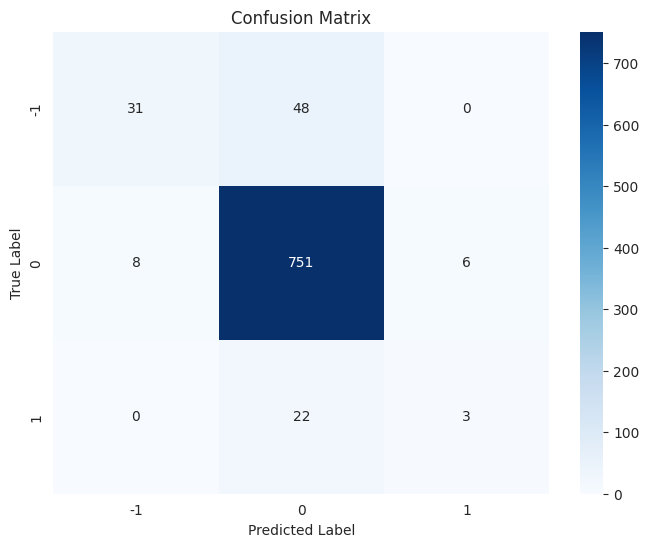

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


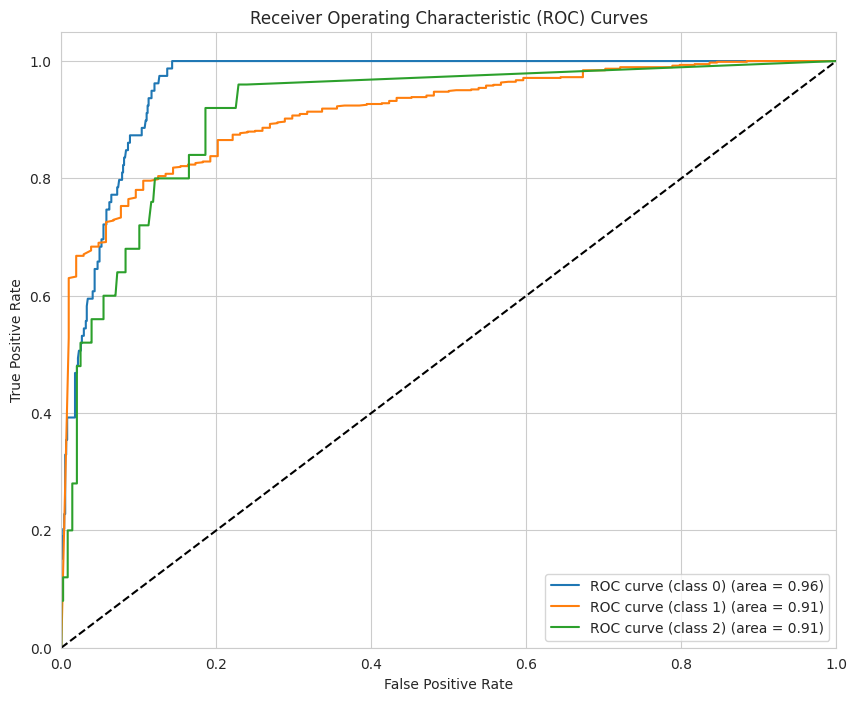

In [100]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], clf.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


In [101]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

X, y = data.drop('bin', axis=1), data['bin'].astype(int)
skf = StratifiedKFold(n_splits=5, shuffle=False)

accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    tree = DecisionTreeClassifier(class_weight='balanced')
    bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=100, max_samples=avg_uniq.mean(), n_jobs=-1)
    clf = OneVsRestClassifier(bagging_clf, n_jobs=-1)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(classification_report(y_test, y_pred))

print(f'Cross-validated accuracy: {np.mean(accuracies)} ± {np.std(accuracies)}')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        56
           0       0.87      0.99      0.93       610
           1       0.00      0.00      0.00        30

    accuracy                           0.86       696
   macro avg       0.29      0.33      0.31       696
weighted avg       0.77      0.86      0.81       696



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.34      0.18      0.24        56
           0       0.89      0.97      0.93       609
           1       0.00      0.00      0.00        30

    accuracy                           0.86       695
   macro avg       0.41      0.38      0.39       695
weighted avg       0.80      0.86      0.83       695

              precision    recall  f1-score   support

          -1       0.50      0.05      0.10        56
           0       0.88      0.99      0.93       610
           1       0.17      0.03      0.06        29

    accuracy                           0.87       695
   macro avg       0.52      0.36      0.36       695
weighted avg       0.82      0.87      0.83       695

              precision    recall  f1-score   support

          -1       0.43      0.36      0.39        56
           0       0.90      0.93      0.91       610
           1       0.06      0.03      0.04        29

    accuracy        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
